In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read Train CSV
X_train_preprocessed = pd.read_csv("X_train_preprocessed.csv", index_col='row_index')
y_train_preprocessed = pd.read_csv("y_train_preprocessed.csv", index_col='row_index')
X_test_preprocessed = pd.read_csv("X_test_preprocessed.csv", index_col='row_index')

# Training Model with partial data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_preprocessed, y_train_preprocessed, test_size=0.05, random_state=42, stratify=y_train_preprocessed)

In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

# Define hyperparameters for the XGBClassifier
n_estimators = 5000     # Number of boosting rounds (trees)
learning_rate = 0.1    # Step size shrinkage
max_depth = 12         # Maximum tree depth
subsample = 0.8        # Fraction of samples used for training each tree
colsample_bytree = 0.8 # Fraction of features used for each tree
random_state = 42      # Random state for reproducibility

# Initialize the XGBClassifier with GPU support
model = XGBClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    random_state=random_state,
    tree_method='gpu_hist',  # Enable GPU acceleration
    predictor='gpu_predictor',  # Use GPU for predictions as well
    use_label_encoder=False,  # Disable label encoding warning
    eval_metric="logloss"     # Use log-loss as the evaluation metric
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = model.predict(X_train)  # Predictions on training data
y_pred_test = model.predict(X_validation)  # Predictions on test data

# Evaluate the model on the training set
f1_train = f1_score(y_train, y_pred_train, average='weighted')
accuracy_train = accuracy_score(y_train, y_pred_train)

# Evaluate the model on the test set
f1_test = f1_score(y_validation, y_pred_test, average='weighted')
accuracy_test = accuracy_score(y_validation, y_pred_test)

# Print results
print("Training Performance:")
print(f"F1 Score (Train): {f1_train:.4f}")
print(f"Accuracy (Train): {accuracy_train:.4f}")

print("\nTesting Performance:")
print(f"F1 Score (Test): {f1_test:.4f}")
print(f"Accuracy (Test): {accuracy_test:.4f}")


C:\Users\adjal\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:44:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\adjal\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:44:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\adjal\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c5

Training Performance:
F1 Score (Train): 0.9999
Accuracy (Train): 0.9999

Testing Performance:
F1 Score (Test): 0.9385
Accuracy (Test): 0.9385


# Training Model with complete data

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

# Define hyperparameters for the XGBClassifier
n_estimators = 5000     # Number of boosting rounds (trees)
learning_rate = 0.1    # Step size shrinkage
max_depth = 12         # Maximum tree depth
subsample = 0.8        # Fraction of samples used for training each tree
colsample_bytree = 0.8 # Fraction of features used for each tree
random_state = 42      # Random state for reproducibility

# Initialize the XGBClassifier with GPU support
model = XGBClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    random_state=random_state,
    tree_method='gpu_hist',  # Enable GPU acceleration
    predictor='gpu_predictor',  # Use GPU for predictions as well
    use_label_encoder=False,  # Disable label encoding warning
    eval_metric="logloss"     # Use log-loss as the evaluation metric
)

# Train the model
model.fit(X_train_preprocessed, y_train_preprocessed)

C:\Users\adjal\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\adjal\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
def encode_y(df):
    forward = {'Very Low': 0, 'Low': 1, 'Average': 2, 'High': 3, 'Very High': 4}
    backward = {v: k for k, v in forward.items()}
    df['piezo_groundwater_level_category'] = df['piezo_groundwater_level_category'].map(forward)
    return df

def decode_y(df):
    forward = {'Very Low': 0, 'Low': 1, 'Average': 2, 'High': 3, 'Very High': 4}
    backward = {v: k for k, v in forward.items()}
    df['piezo_groundwater_level_category'] = df['piezo_groundwater_level_category'].map(backward)
    return df

In [8]:
y_test_real = model.predict(X_test_preprocessed)  # Predictions on test data

In [ ]:
# Decode prediction to csv

predictions_df = pd.DataFrame(y_test_real, index=X_test_preprocessed.index, columns=['piezo_groundwater_level_category'])
predictions_df = decode_y(predictions_df)

# Save predictions to CSV
predictions_df.to_csv('predictionsXX.csv', index_label="row_index")

# Variable Importances

                                 Feature  Importance
7                    piezo_producer_code    0.046735
47                      measurement_year    0.046517
34           prelev_commune_code_insee_0    0.041826
42                insee_med_living_level    0.041275
45                 distance_from_algiers    0.041157
41                     insee_pop_commune    0.039910
3                 piezo_station_latitude    0.039414
33  prelev_volume_obtention_mode_label_0    0.039410
44                         insee_%_const    0.039126
43                           insee_%_ind    0.038054
2                piezo_station_longitude    0.037888
40                          insee_%_agri    0.037593
32                  prelev_usage_label_0    0.035713
36                  prelev_usage_label_1    0.033295
38                  prelev_usage_label_2    0.033062
30                  distance_piezo_hydro    0.032227
37                       prelev_volume_2    0.029473
26                  distance_piezo_meteo    0.

<Figure size 2000x2000 with 0 Axes>

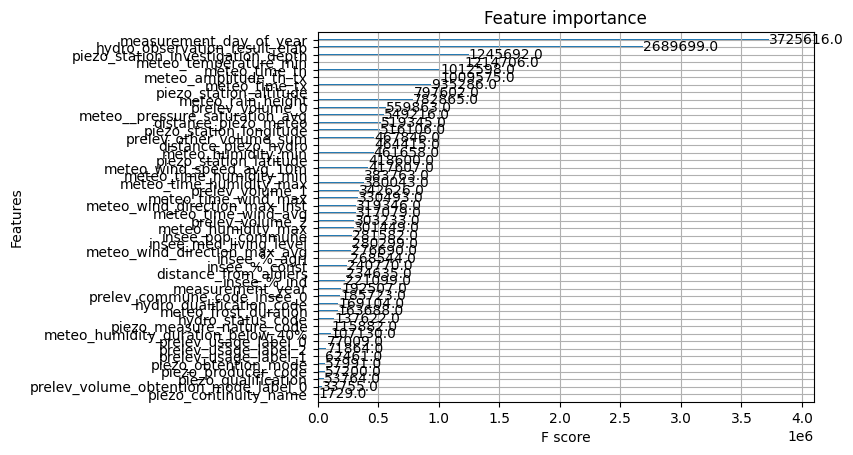

In [9]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot feature importances
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))
plot_importance(model, importance_type='weight')
plt.show()
